In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [13]:
# Load dataset
df = pd.read_csv("SentimentData.csv")  # Replace with actual file path

# Drop unnecessary columns
df = df[['statement', 'status']].dropna()

# Basic text preprocessing
def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    return text.strip()

df['cleaned_statement'] = df['statement'].apply(clean_text)

# Display dataset info
print(df.head())
print(df['status'].value_counts())  # Check class distribution

                                           statement   status  \
0                                         oh my gosh  Anxiety   
1  trouble sleeping, confused mind, restless hear...  Anxiety   
2  All wrong, back off dear, forward doubt. Stay ...  Anxiety   
3  I've shifted my focus to something else but I'...  Anxiety   
4  I'm restless and restless, it's been a month n...  Anxiety   

                                   cleaned_statement  
0                                         oh my gosh  
1  trouble sleeping confused mind restless heart ...  
2  all wrong back off dear forward doubt stay in ...  
3  i ve shifted my focus to something else but i ...  
4  i m restless and restless it s been a month no...  
status
Normal                  16343
Depression              15404
Suicidal                10652
Anxiety                  3841
Bipolar                  2777
Stress                   2587
Personality disorder     1077
Name: count, dtype: int64


In [16]:
# Split dataset into train-test
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_statement'], df['status'], test_size=0.2, random_state=42)

# Convert text to numerical representation (TF-IDF)
vectorizer = TfidfVectorizer(max_features=5000)  # Limit features for efficiency
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [18]:
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
y_pred_nb = nb_model.predict(X_test_tfidf)

print("Naïve Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Naïve Bayes Accuracy: 0.6632817690044605
                      precision    recall  f1-score   support

             Anxiety       0.83      0.59      0.69       755
             Bipolar       0.90      0.39      0.54       527
          Depression       0.49      0.81      0.61      3016
              Normal       0.85      0.80      0.83      3308
Personality disorder       0.89      0.07      0.13       237
              Stress       0.88      0.11      0.19       536
            Suicidal       0.73      0.53      0.62      2158

            accuracy                           0.66     10537
           macro avg       0.80      0.47      0.52     10537
        weighted avg       0.73      0.66      0.65     10537



In [20]:
lr_model = LogisticRegression(max_iter=500)
lr_model.fit(X_train_tfidf, y_train)
y_pred_lr = lr_model.predict(X_test_tfidf)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.7728955110562779
                      precision    recall  f1-score   support

             Anxiety       0.82      0.76      0.79       755
             Bipolar       0.88      0.70      0.78       527
          Depression       0.69      0.74      0.72      3016
              Normal       0.86      0.95      0.91      3308
Personality disorder       0.87      0.44      0.59       237
              Stress       0.71      0.50      0.59       536
            Suicidal       0.70      0.67      0.69      2158

            accuracy                           0.77     10537
           macro avg       0.79      0.68      0.72     10537
        weighted avg       0.77      0.77      0.77     10537



In [22]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)
y_pred_rf = rf_model.predict(X_test_tfidf)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.7059884217519218
                      precision    recall  f1-score   support

             Anxiety       0.89      0.54      0.67       755
             Bipolar       0.97      0.44      0.60       527
          Depression       0.55      0.81      0.66      3016
              Normal       0.84      0.95      0.89      3308
Personality disorder       0.99      0.28      0.44       237
              Stress       0.98      0.24      0.39       536
            Suicidal       0.72      0.47      0.57      2158

            accuracy                           0.71     10537
           macro avg       0.85      0.53      0.60     10537
        weighted avg       0.75      0.71      0.69     10537



C:\Users\abcd\AppData\Local\Temp\ipykernel_4080\2972276279.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()), palette="coolwarm")


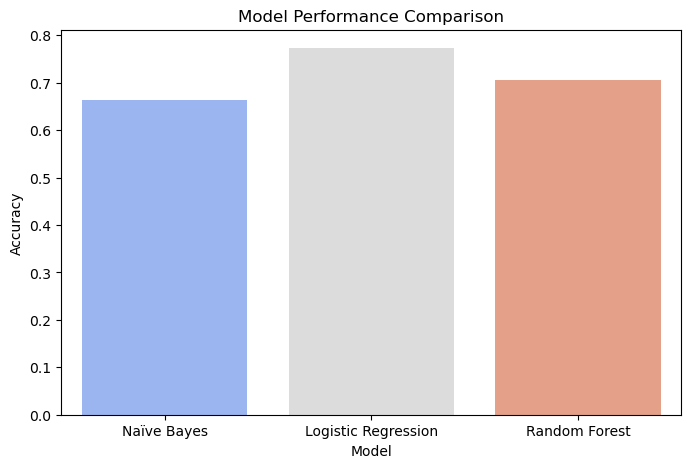

In [24]:
# Compare model accuracies
accuracy_scores = {
    "Naïve Bayes": accuracy_score(y_test, y_pred_nb),
    "Logistic Regression": accuracy_score(y_test, y_pred_lr),
    "Random Forest": accuracy_score(y_test, y_pred_rf)
}

# Plot results
plt.figure(figsize=(8, 5))
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()), palette="coolwarm")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Performance Comparison")
plt.show()

In [26]:
def predict_emotion(text, model):
    text = clean_text(text)
    text_tfidf = vectorizer.transform([text])
    prediction = model.predict(text_tfidf)
    return prediction[0]

# Test example
sample_text = "I feel so lost and alone."
predicted_emotion = predict_emotion(sample_text, lr_model)  # Using best model (Logistic Regression)
print(f"Predicted Emotion: {predicted_emotion}")

Predicted Emotion: Depression
